In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('../models/simplyp_model.txt', 
                                                              '../models/data/simplyp_tarland.dat')

In [3]:
_ = ()
app.start_date[_] = '1995-1-1'
app.run()

True

<AxesSubplot:xlabel='Date'>

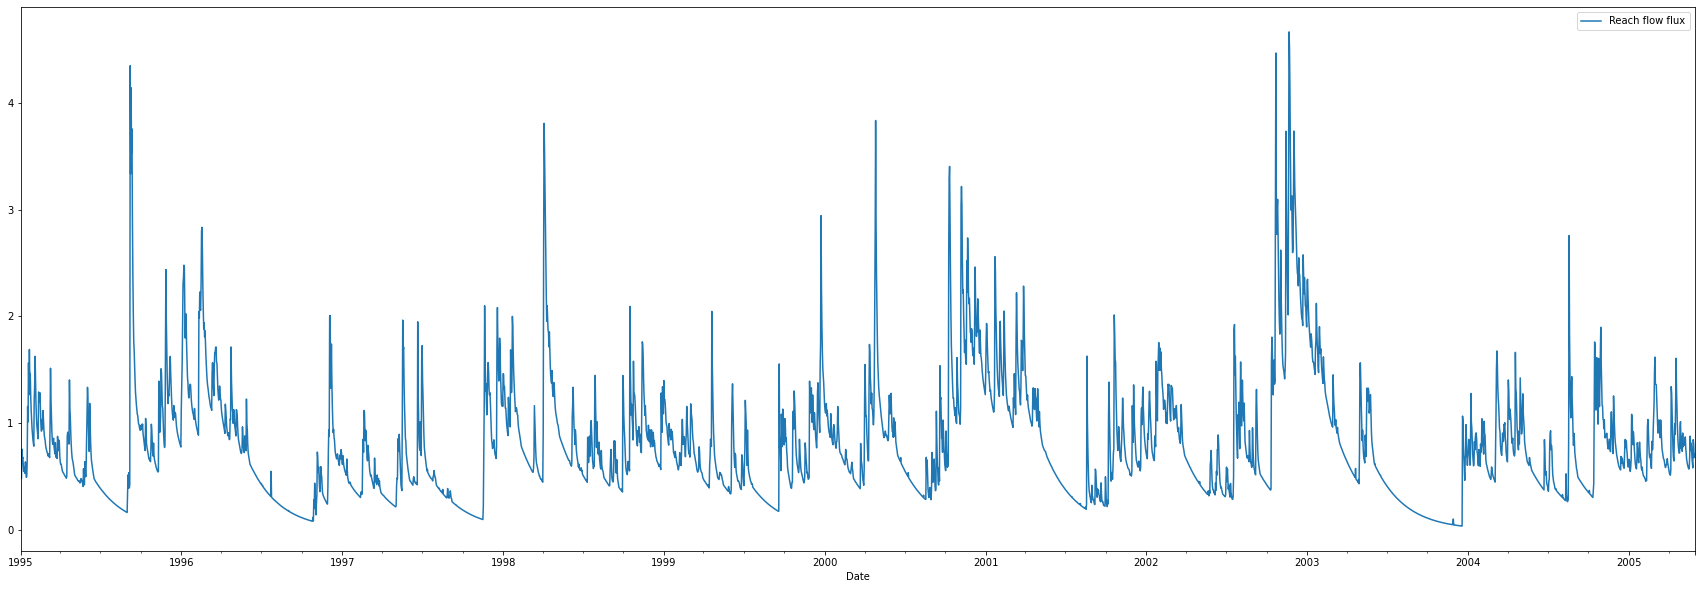

In [4]:
#flow = app.river.water.flow
flow = app.var("Reach flow flux")
flow["Coull"].plot(figsize=(30, 10), legend=True)
#flow[0].plot(figsize=(30, 10))  # Can also use integer indexes.

<AxesSubplot:xlabel='Date'>

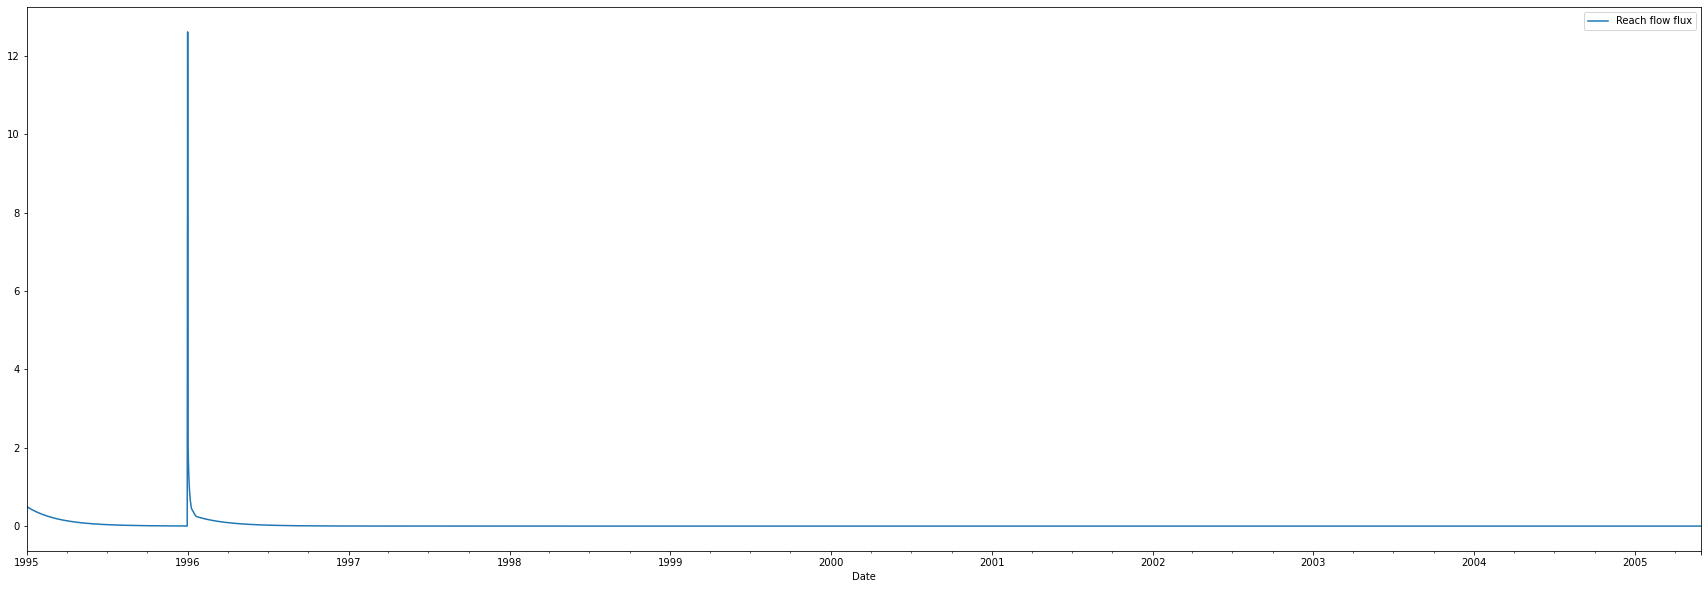

In [9]:

# Modify input series
precip = app.var('Precipitation')[()]
precip.loc[:] = 0
precip.loc['1996-1-1'] = 200
app.var('Precipitation')[()] = precip

app.run()
app.var('Reach flow flux')['Coull'].plot(figsize=(30, 10), legend=True)

In [ ]:
sq = app["SimplyQ land"]
sq.bfi[_] = 0.9
sq.tc_g[_] = 100
#app.lu_prop["One", "Forest"] = 1
print(sq.bfi.max())

In [ ]:
app.run()
app.river.water.flow['Coull'].plot(figsize=(30, 10))

In [ ]:
app.var('Observed Q')[_].plot(figsize=(30, 10))

In [ ]:
# This is if SimplyC was loaded instead
app.start_date[_] = '1986-1-1'
app.run()

fig, ax = plt.subplots(1, figsize=(30, 10))
app.river.water.oc.conc()['One'].plot(ax=ax, legend=True)
app.var('Observed DOC')[_].plot(ax=ax, marker='o', legend=True)

In [ ]:
app['HBVSnow'].ddf_melt.description()

In [ ]:
#Want to make something like this work
app.layer.water.temp['Drammensfjorden', :]
#or
app.layer.water.temp['Drammensfjorden', 0:20]  #etc.
#Then have to scan it first to chekc if there are slices, then this returns a np.array, not a pd.Series,
#but there should instead be some function app.result_date_index() or something that lets you get a matching date
# index for plotting.
#(wouldn't work well if one slice is sub-indexed to another, but we could check for that in the c_api)


In [ ]:
a = (1,)
a += 4
a